<font size="12">Regression Assignment</font>

### 1.	Loading and Preprocessing 

### Load the California Housing dataset using the fetch_california_housing function from sklearn.

 This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

In [20]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()



In [21]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

### Convert the dataset into a pandas DataFrame for easier handling

In [22]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

data = california_housing.data
data['Target'] = california_housing.target


In [23]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [25]:
data.shape

(20640, 9)

## Data preprocessing

### checking duplicates

In [26]:
data.duplicated().sum()

0

In [27]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [28]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [29]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Checking Outliers

In [30]:
nu=data.select_dtypes("number")

In [31]:
nu.skew()

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
Target         0.977763
dtype: float64

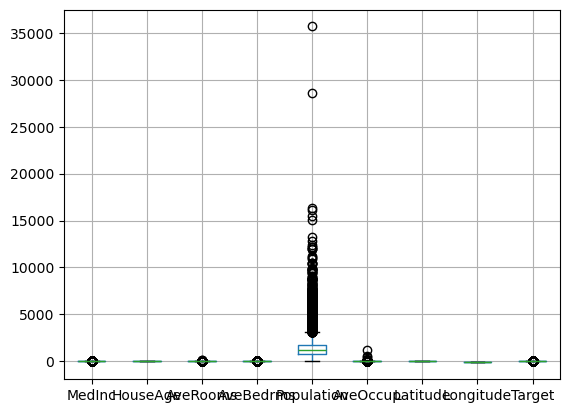

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
nu.boxplot()
plt.show()

### Handling Outliers

### IQR Method MedInc

In [37]:
q1=data['MedInc'].quantile(0.25)
q3=data['MedInc'].quantile(0.75)
IQR=q3-q1


In [38]:
q1,q3,IQR


(2.5633999999999997, 4.74325, 2.17985)

In [39]:
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
lower_limit,upper_limit

(-0.7063750000000004, 8.013024999999999)

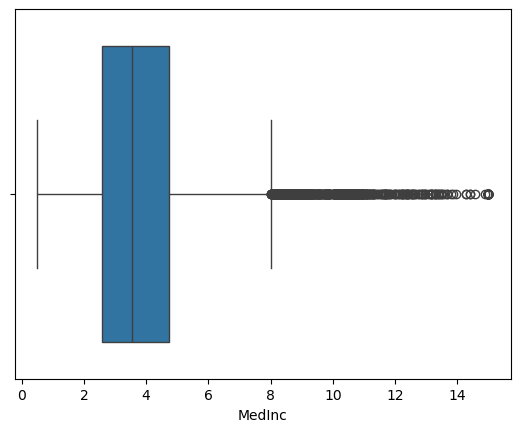

In [40]:
sns.boxplot(x=data['MedInc'])
plt.show()

In [41]:
#to find the outliers
data.loc[(data['MedInc']>upper_limit)|(data['MedInc']<lower_limit)]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.52600
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.58500
131,11.6017,18.0,8.335052,1.082474,533.0,2.747423,37.84,-122.19,3.92600
134,8.2049,28.0,6.978947,0.968421,463.0,2.436842,37.83,-122.19,3.35200
135,8.4010,26.0,7.530806,1.056872,542.0,2.568720,37.83,-122.20,3.51200
...,...,...,...,...,...,...,...,...,...
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20428,8.7288,6.0,8.715842,1.102970,3385.0,3.351485,34.23,-118.83,4.25800
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [42]:
#trimming
new_data=data.loc[(data['MedInc']<upper_limit)&(data['MedInc']>lower_limit)]
print('before outliers:', len(data))
print('after outliers:',len(new_data))
print('outliers:',len(data)-len(new_data))

before outliers: 20640
after outliers: 19959
outliers: 681


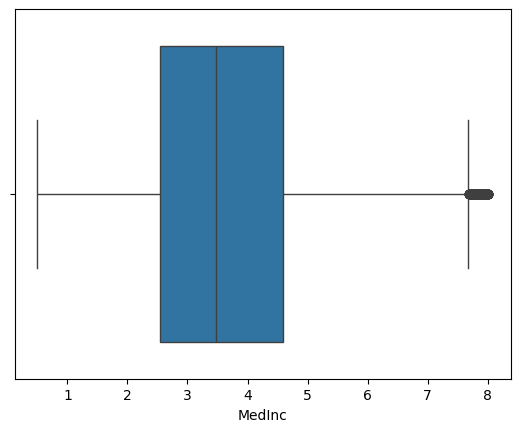

In [43]:
sns.boxplot(x=new_data['MedInc'])
plt.show()


In [44]:
# Caping
new_data=data.copy()
new_data.loc[(new_data['MedInc']>upper_limit),'MedInc']=upper_limit
new_data.loc[(new_data['MedInc']<lower_limit),'MedInc']=lower_limit

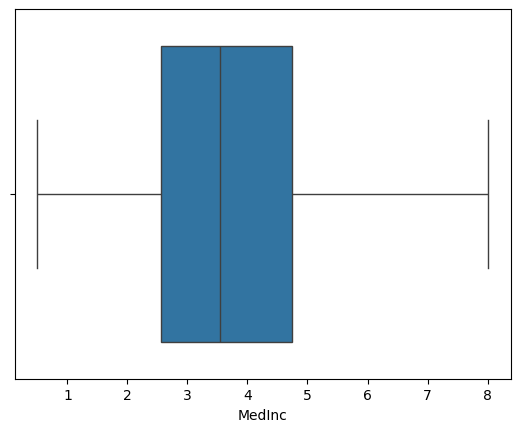

In [45]:
sns.boxplot(x=new_data['MedInc'])
plt.show()

#### AveRooms Outliers	

In [46]:
q1=data['AveRooms'].quantile(0.25)
q3=data['AveRooms'].quantile(0.75)
IQR=q3-q1

In [47]:
q1,q3,IQR

(4.440716235896959, 6.052380952380952, 1.6116647164839932)

In [48]:
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
lower_limit,upper_limit

(2.023219161170969, 8.469878027106942)

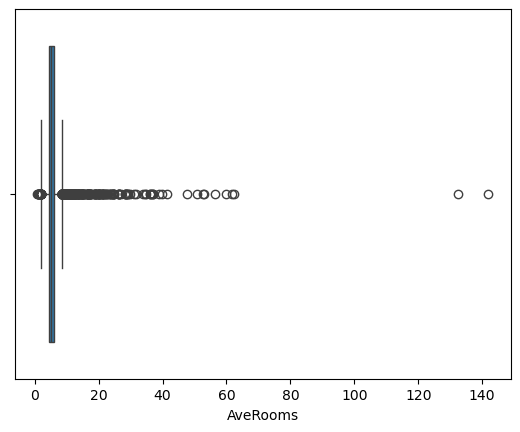

In [49]:
sns.boxplot(x=data['AveRooms'])
plt.show()

In [50]:
#to find the outliers
data.loc[(data['AveRooms']>upper_limit)|(data['AveRooms']<lower_limit)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
73,0.4999,46.0,1.714286,0.571429,18.0,2.571429,37.81,-122.29,0.67500
155,8.8793,52.0,8.972868,1.131783,861.0,3.337209,37.81,-122.23,4.10300
511,13.4990,42.0,8.928358,1.000000,1018.0,3.038806,37.82,-122.22,5.00001
512,12.2138,52.0,9.210227,1.039773,1001.0,2.843750,37.82,-122.23,5.00001
514,12.3804,52.0,9.122715,1.033943,1192.0,3.112272,37.82,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20408,7.7889,26.0,8.730038,1.045627,842.0,3.201521,34.19,-118.88,3.09900
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20428,8.7288,6.0,8.715842,1.102970,3385.0,3.351485,34.23,-118.83,4.25800
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [51]:
# Caping
new_data=data.copy()
new_data.loc[(new_data['AveRooms']>upper_limit),'AveRooms']=upper_limit
new_data.loc[(new_data['AveRooms']<lower_limit),'AveRooms']=lower_limit

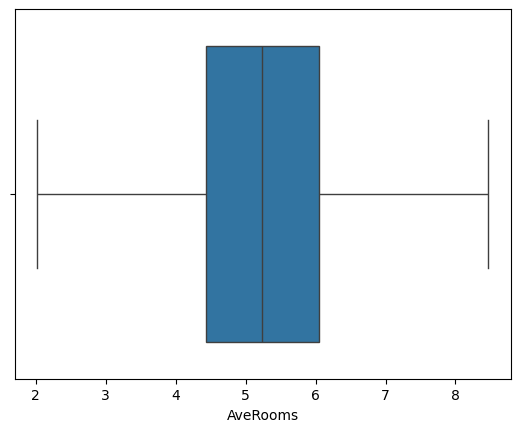

In [52]:
sns.boxplot(x=new_data['AveRooms'])
plt.show()

#### AveBedrms Outlier

In [53]:
q1=data['AveBedrms'].quantile(0.25)
q3=data['AveBedrms'].quantile(0.75)
IQR=q3-q1

In [54]:
q1,q3,IQR

(1.006079046038478, 1.099526066350711, 0.09344702031223284)

In [55]:
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
lower_limit,upper_limit

(0.8659085155701288, 1.2396965968190603)

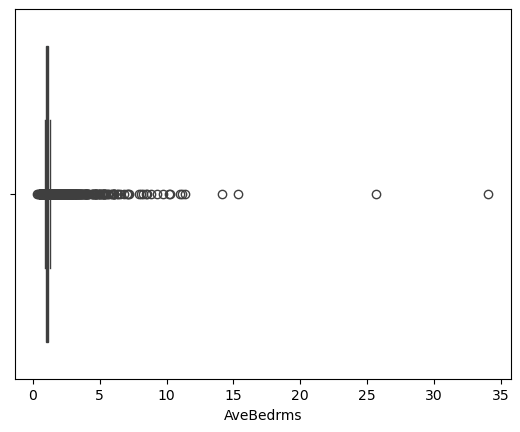

In [56]:
sns.boxplot(x=data['AveBedrms'])
plt.show()

In [57]:
#to find the outliers
data.loc[(data['AveBedrms']>upper_limit)|(data['AveBedrms']<lower_limit)]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
41,1.2852,51.0,3.759036,1.248996,517.0,2.076305,37.83,-122.26,1.500
57,0.8172,52.0,6.102459,1.372951,728.0,2.983607,37.82,-122.28,0.853
59,2.5625,2.0,2.771930,0.754386,94.0,1.649123,37.82,-122.29,0.600
61,6.1183,49.0,5.869565,1.260870,86.0,3.739130,37.82,-122.29,0.750
62,0.9011,50.0,6.229508,1.557377,377.0,3.090164,37.81,-122.29,0.861
...,...,...,...,...,...,...,...,...,...
20423,5.4346,17.0,6.261168,1.505155,578.0,1.986254,34.08,-119.00,4.286
20608,1.7167,24.0,5.400000,1.273171,768.0,3.746341,39.10,-121.59,0.488
20620,4.5625,40.0,4.125000,0.854167,151.0,3.145833,39.05,-121.48,1.000
20621,2.3661,37.0,7.923567,1.573248,484.0,3.082803,39.01,-121.47,0.775


In [58]:
# Caping
new_data=data.copy()
new_data.loc[(new_data['AveBedrms']>upper_limit),'AveBedrms']=upper_limit
new_data.loc[(new_data['AveBedrms']<lower_limit),'AveBedrms']=lower_limit

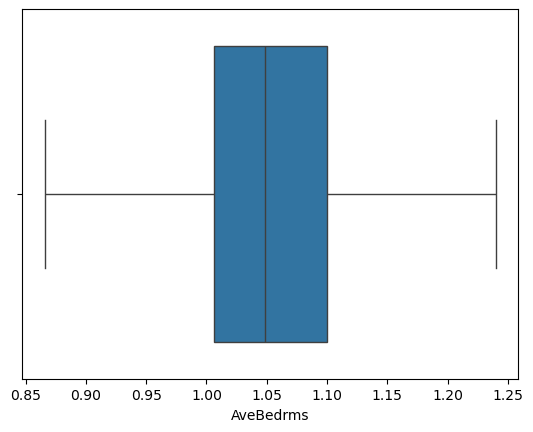

In [59]:
sns.boxplot(x=new_data['AveBedrms'])
plt.show()

#### Population	Outlier

In [60]:
q1=data['Population'].quantile(0.25)
q3=data['Population'].quantile(0.75)
IQR=q3-q1

In [61]:
q1,q3,IQR

(787.0, 1725.0, 938.0)

In [62]:
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
lower_limit,upper_limit

(-620.0, 3132.0)

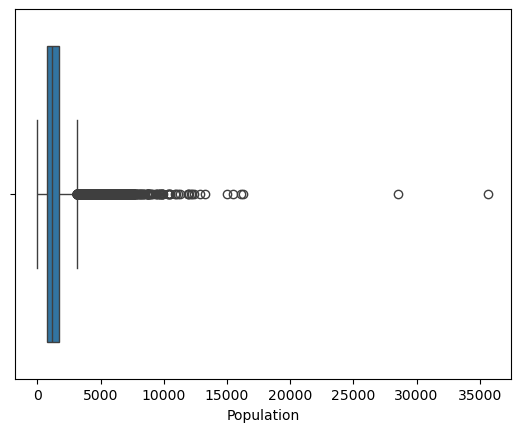

In [63]:
sns.boxplot(x=data['Population'])
plt.show()

In [64]:
#to find the outliers
data.loc[(data['Population']>upper_limit)|(data['Population']<lower_limit)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
95,2.0096,36.0,2.294016,1.066294,3469.0,1.493328,37.80,-122.26,1.300
185,2.1917,43.0,4.844029,1.091795,4367.0,3.547522,37.79,-122.23,1.128
283,5.9849,22.0,6.528724,1.041179,4985.0,2.534316,37.79,-122.16,3.710
460,1.4012,52.0,3.105714,1.060000,3337.0,9.534286,37.87,-122.26,1.750
485,1.6307,35.0,2.962687,1.001148,3276.0,1.880597,37.86,-122.26,2.536
...,...,...,...,...,...,...,...,...,...
20543,1.7311,33.0,3.882852,1.029994,3717.0,2.103565,38.55,-121.74,1.826
20544,2.0650,23.0,4.803493,1.013646,6330.0,3.455240,38.55,-121.76,2.194
20563,3.1250,9.0,5.148007,1.119593,6837.0,2.899491,38.67,-121.75,1.325
20604,2.3496,17.0,4.551392,0.962527,3265.0,3.495717,39.12,-121.54,0.650


In [65]:
# Caping
new_data=data.copy()
new_data.loc[(new_data['Population']>upper_limit),'Population']=upper_limit
new_data.loc[(new_data['Population']<lower_limit),'Population']=lower_limit

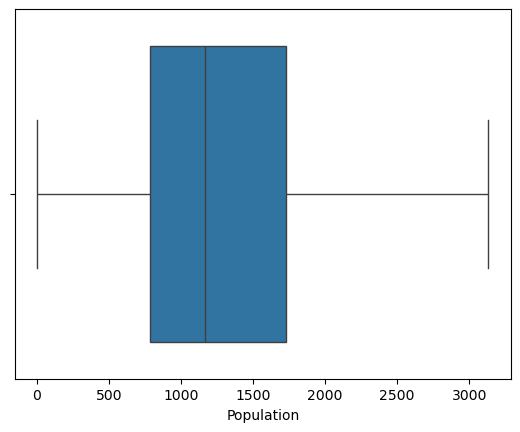

In [66]:
sns.boxplot(x=new_data['Population'])
plt.show()

#### AveOccup Outlier	

In [67]:
q1=data['AveOccup'].quantile(0.25)
q3=data['AveOccup'].quantile(0.75)
IQR=q3-q1

In [68]:
q1,q3,IQR

(2.4297411475535755, 3.2822609242736216, 0.8525197767200461)

In [69]:
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
lower_limit,upper_limit

(1.1509614824735064, 4.5610405893536905)

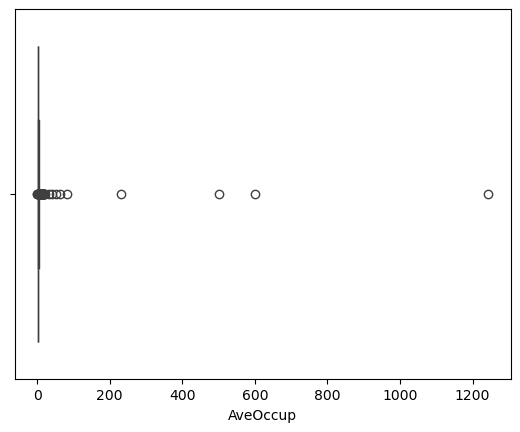

In [70]:
sns.boxplot(x=data['AveOccup'])
plt.show()

In [71]:
#to find the outliers
data.loc[(data['AveOccup']>upper_limit)|(data['AveOccup']<lower_limit)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
91,0.8668,52.0,2.443182,0.988636,904.0,10.272727,37.80,-122.28,1.37500
92,0.7500,52.0,2.823529,0.911765,191.0,5.617647,37.80,-122.28,1.62500
200,3.0257,52.0,4.046948,1.009390,994.0,4.666667,37.78,-122.23,0.80800
270,3.8750,33.0,3.021277,0.659574,575.0,12.234043,37.78,-122.18,2.25000
...,...,...,...,...,...,...,...,...,...
20353,5.0066,12.0,3.800000,1.466667,69.0,4.600000,34.13,-119.05,2.75000
20393,5.7560,16.0,6.117493,1.026110,2007.0,5.240209,34.22,-118.88,3.02700
20513,2.6250,34.0,5.597403,1.103896,391.0,5.077922,38.67,-121.63,2.25000
20527,1.4653,7.0,3.525794,1.017857,4479.0,8.886905,38.54,-121.79,3.10000


In [72]:
# Caping
new_data=data.copy()
new_data.loc[(new_data['AveOccup']>upper_limit),'AveOccup']=upper_limit
new_data.loc[(new_data['AveOccup']<lower_limit),'AveOccup']=lower_limit

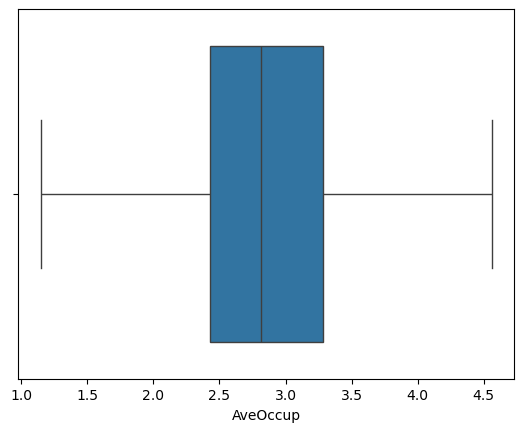

In [73]:
sns.boxplot(x=new_data['AveOccup'])
plt.show()

#### Target Handling Outlier

In [75]:
q1=data['Target'].quantile(0.25)
q3=data['Target'].quantile(0.75)
IQR=q3-q1

In [76]:
q1,q3,IQR

(1.196, 2.6472499999999997, 1.4512499999999997)

In [77]:
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
lower_limit,upper_limit

(-0.9808749999999995, 4.824124999999999)

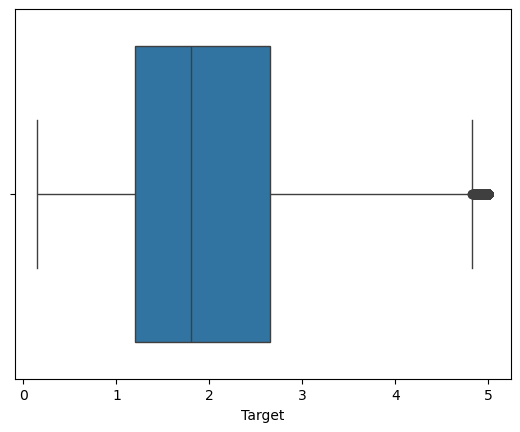

In [78]:
sns.boxplot(x=data['Target'])
plt.show()

In [79]:
#to find the outliers
data.loc[(data['Target']>upper_limit)|(data['Target']<lower_limit)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [80]:
# Caping
new_data=data.copy()
new_data.loc[(new_data['Target']>upper_limit),'Target']=upper_limit
new_data.loc[(new_data['Target']<lower_limit),'Target']=lower_limit

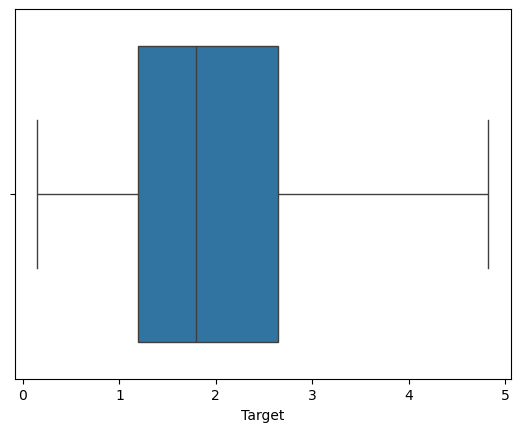

In [81]:
sns.boxplot(x=new_data['Target'])
plt.show()

### Visualization

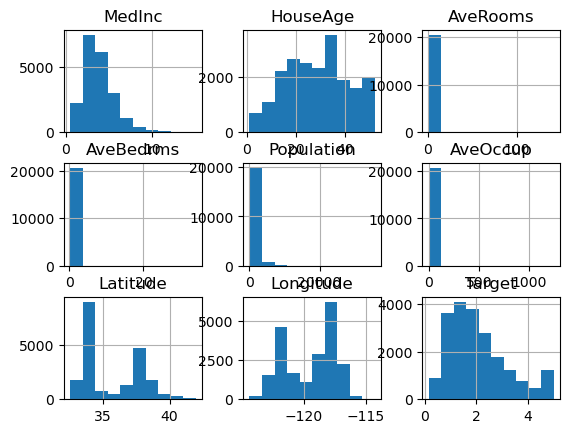

In [82]:
nu.hist()
plt.show()

In [83]:
corr=nu.corr()
import seaborn as sns
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


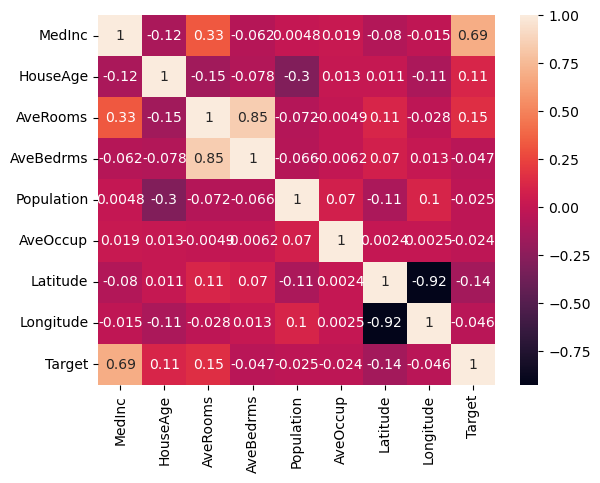

In [84]:
sns.heatmap(corr,annot=True)
plt.show()

In [85]:
data.skew()

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
Target         0.977763
dtype: float64

In [87]:
# Features X
X = data[["MedInc","AveRooms","HouseAge", "AveBedrms", "AveOccup", "Population","Latitude","Longitude"]]
y = data['Target'] #y target
X

,MedInc,AveRooms,HouseAge,AveBedrms,AveOccup,Population,Latitude,Longitude
0,8.3252,6.984127,41.0,1.023810,2.555556,322.0,37.88,-122.23
1,8.3014,6.238137,21.0,0.971880,2.109842,2401.0,37.86,-122.22
2,7.2574,8.288136,52.0,1.073446,2.802260,496.0,37.85,-122.24
3,5.6431,5.817352,52.0,1.073059,2.547945,558.0,37.85,-122.25
4,3.8462,6.281853,52.0,1.081081,2.181467,565.0,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,5.045455,25.0,1.133333,2.560606,845.0,39.48,-121.09
20636,2.5568,6.114035,18.0,1.315789,3.122807,356.0,39.49,-121.21
20637,1.7000,5.205543,17.0,1.120092,2.325635,1007.0,39.43,-121.22
20638,1.8672,5.329513,18.0,1.171920,2.123209,741.0,39.43,-121.32


### Scaling

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Implementing Algorithms

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [91]:
X_train.shape

(16512, 8)

In [92]:
y_train.shape

(16512,)

In [93]:
X_test.shape

(4128, 8)

In [94]:
y_test.shape

(4128,)

#### Linear Regression Algorithm

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [155]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [156]:
# Predictions
y_pred = model.predict(X_test)

y_pred #PREDICTED


array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [150]:
import pandas as pd

# Assuming y_pred and y_test are numpy arrays or pandas Series
results_df = pd.DataFrame({
    'Actual Values': y_test,
   'Predicted Values': y_pred
})

print(results_df)


       Actual Values  Predicted Values
20046        0.47700          0.521662
3024         0.45800          1.568436
15663        5.00001          3.588739
20484        2.18600          2.482048
9814         2.78000          2.582375
...              ...               ...
15362        2.63300          2.041517
16623        2.66800          2.078151
18086        5.00001          4.805110
2144         0.72300          0.708789
3665         1.51500          1.735875

[4128 rows x 2 columns]


In [125]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 0.5332001304956565
MSE: 0.5558915986952442
R2: 0.575787706032451


#### Decision Tree Regressor

In [126]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [127]:
# Predictions
y_pred = model.predict(X_test)

y_pred #PREDICTED

array([0.414  , 1.203  , 5.00001, ..., 5.00001, 0.66   , 2.071  ])

In [128]:
import pandas as pd

# Assuming y_pred and y_test are numpy arrays or pandas Series
results_df = pd.DataFrame({
    'Actual Values': y_test,
   'Predicted Values': y_pred
})

print(results_df)

       Actual Values  Predicted Values
20046        0.47700           0.41400
3024         0.45800           1.20300
15663        5.00001           5.00001
20484        2.18600           2.86700
9814         2.78000           2.25700
...              ...               ...
15362        2.63300           1.96700
16623        2.66800           1.40000
18086        5.00001           5.00001
2144         0.72300           0.66000
3665         1.51500           2.07100

[4128 rows x 2 columns]


In [129]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 0.4501694694767442
MSE: 0.4825159169030281
R2: 0.6317821955472557


#### Random Forest Regressor

In [130]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [131]:
# Predictions
y_pred = model.predict(X_test)

y_pred #PREDICTED

array([0.50187  , 0.72022  , 4.9267466, ..., 4.8706289, 0.70955  ,
       1.65686  ])

In [132]:
import pandas as pd

# Assuming y_pred and y_test are numpy arrays or pandas Series
results_df = pd.DataFrame({
    'Actual Values': y_test,
   'Predicted Values': y_pred
})

print(results_df)

       Actual Values  Predicted Values
20046        0.47700          0.501870
3024         0.45800          0.720220
15663        5.00001          4.926747
20484        2.18600          2.540350
9814         2.78000          2.280150
...              ...               ...
15362        2.63300          2.356180
16623        2.66800          2.001070
18086        5.00001          4.870629
2144         0.72300          0.709550
3665         1.51500          1.656860

[4128 rows x 2 columns]


In [133]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 0.325941886652132
MSE: 0.25401647893600976
R2: 0.8061548088009876


#### Gradient Boosting Regressor

In [134]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [135]:
# Predictions
y_pred = model.predict(X_test)

y_pred #PREDICTED

array([0.50518761, 1.09334601, 4.24570956, ..., 4.68181295, 0.85329537,
       1.96275219])

In [136]:
import pandas as pd

# Assuming y_pred and y_test are numpy arrays or pandas Series
results_df = pd.DataFrame({
    'Actual Values': y_test,
   'Predicted Values': y_pred
})

print(results_df)

       Actual Values  Predicted Values
20046        0.47700          0.505188
3024         0.45800          1.093346
15663        5.00001          4.245710
20484        2.18600          2.545174
9814         2.78000          2.279103
...              ...               ...
15362        2.63300          2.099811
16623        2.66800          1.601285
18086        5.00001          4.681813
2144         0.72300          0.853295
3665         1.51500          1.962752

[4128 rows x 2 columns]


In [137]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 0.3717234163505605
MSE: 0.2940804571354899
R2: 0.7755811643398038


#### Support Vector Regressor (SVR)

In [139]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [140]:
# Predictions
y_pred = model.predict(X_test)

y_pred #PREDICTED

array([0.52166189, 1.56843583, 3.58873947, ..., 4.80511008, 0.70878931,
       1.73587521])

In [141]:
import pandas as pd

# Assuming y_pred and y_test are numpy arrays or pandas Series
results_df = pd.DataFrame({
    'Actual Values': y_test,
   'Predicted Values': y_pred
})

print(results_df)

       Actual Values  Predicted Values
20046        0.47700          0.521662
3024         0.45800          1.568436
15663        5.00001          3.588739
20484        2.18600          2.482048
9814         2.78000          2.582375
...              ...               ...
15362        2.63300          2.041517
16623        2.66800          2.078151
18086        5.00001          4.805110
2144         0.72300          0.708789
3665         1.51500          1.735875

[4128 rows x 2 columns]


In [142]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 0.3977630963437863
MSE: 0.3551984619989423
R2: 0.7289407597956459


### __Comparison of Model Results__

| Algorithm | MAE | MSE | R2 |
| --- | --- | --- | --- |
| Linear Regression | 0.53 | 0.55 | 0.57 |
| Decision Tree Regressor | 0.45 | 0.48 | 0.63 |
| Random Forest Regressor | 0.32 | 0.25 | 0.80 |
| Gradient Boosting Regressor | 0.37 | 0.37 | 0.78 |
| Support Vector Regressor | 1.33 | 0.29 | 0.77 |

### __Best-Performing Algorithm__
Algorithm: __Random Forest Regressor__
Justification:
Random Forest achieves the lowest MAE (0.3259), lowest MSE (0.2540), and the highest R² score (0.8062).
This indicates that Random Forest Regressor provides the most accurate predictions on this dataset.
Its ability to capture non-linear relationships and its robustness due to ensembling make it particularly effective for complex datasets like California Housing.


#### __Worst-Performing Algorithm__
Linear Regression is the worst-performing model, as evidenced by:

Highest MSE (0.5559): Indicates higher squared errors compared to other models.
Highest MAE (0.5332): Suggests less accurate predictions.
Lowest R² (0.5758): Explains the least variance in the target variable.
Linear Regression assumes a linear relationship between features and the target. However, the California Housing dataset likely contains complex, non-linear relationships, which Linear Regression fails to capture. This limits its effectiveness compared to tree-based or kernel-based methods.